### Model Diagnostics in Python

In this notebook, I will be trying out some of the model diagnostics, but in this case there will only be two cases - either admitted or not admitted.

First let's read in the necessary libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

df = pd.read_csv('./admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


`1.` Changing prestige to dummy variable columns that are added to `df`.  Then dividing the data into training and test data.  Creating test set as 20% of the data, and using a random state of 0.  Response should be the `admit` column.  [Here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) are the docs.

In [2]:
#Converting "prestige" column into dummy variables
df = pd.get_dummies(df, columns=['prestige'], prefix='prestige')

# Split data into training and test sets as 20% of the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('admit', axis=1), df['admit'], test_size=0.2, random_state=0)

`2.` Now using [sklearn's Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit a logistic model using `gre`, `gpa`, and 3 of your `prestige` dummy variables.  For now, fitting the logistic regression model without changing any of the hyperparameters.  

The usual steps are:
* Instantiate
* Fit (on train)
* Predict (on test)
* Score (compare predict to test)

As a first score, obtaining the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).  

In [3]:
# Fit logistic regression model to training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Compare predictions to actual labels
score = model.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.75


In [5]:
# Obtain confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[56  0]
 [20  4]]


`3.` Now, trying out a few additional metrics: [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) are all popular metrics.  I could compute these directly from the confusion matrix, but I can also use these built in functions in sklearn.

Another very popular set of metrics are [ROC curves and AUC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).  These actually use the probability from the logistic regression models, and not just the label.  [This](http://blog.yhat.com/posts/roc-curves.html) is also a great resource for understanding ROC curves and AUC.

I also provided the ROC plot below.  The ideal case is for this to shoot all the way to the upper left hand corner.  

In [6]:
 # Computing precision, recall, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)

Precision: 1.0
Recall: 0.166666666667
Accuracy: 0.75


In [7]:
# Computing ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)

AUC: 0.755952380952


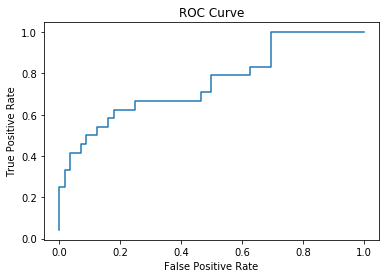

In [9]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()